In [1]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
import sys
from os import path

code_path = path.abspath(path.join('..','..','diss3_code','midi'))
print(code_path, path.exists(code_path))

sys.path.append(code_path)
import midi_utils as mu

/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/midi True


In [3]:
from importlib import reload
reload(mu);

In [4]:
midi_paths = ['MIDI-Freestyle', 'MIDI-Interaction']
midi_paths = [path.abspath(path.join('..','..','..','data',p)) for p in midi_paths]
print([path.exists(p) for p in midi_paths])
midi_files = sum([glob.glob(path.join(mp,'*.mid')) for mp in midi_paths],[] )

[True, True]


In [5]:
midi_files[-5:]

['/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1025.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1026.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1031.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1027.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1046.mid']

In [6]:
timing_df = pd.read_excel('timings_from_abelton.xlsx', engine="openpyxl")
cols =list(timing_df.columns)
cols[1]='group'
timing_df.columns=cols
timing_df

,type,group,minute,seconds,hundreds,total
0,non-predictable,1003,4,49,25,289.25
1,non-predictable,1005,4,49,48,289.48
2,non-predictable,1008,4,49,59,289.59
3,non-predictable,1010,4,58,30,298.30
4,non-predictable,1012,4,49,37,289.37
5,non-predictable,1014,5,0,56,300.56
6,non-predictable,1016,5,7,85,307.85
7,non-predictable,1018,6,4,45,364.45
8,non-predictable,1020,4,49,10,289.10
9,non-predictable,1022,4,49,15,289.15


In [7]:
dir(mu)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'drummer_events',
 'event_filter',
 'get_drumbeat_ticks_for_midi',
 'get_files_for_session',
 'glob',
 'group_events',
 'load_midi',
 'm2',
 'mc',
 'np',
 'path',
 'pd',
 'plt',
 'populate_music_dictionary',
 'sns']

In [8]:
all_ticks = mu.populate_music_dictionary(midi_files)

('1009', 'Freestyle', 43)
('1009', 'Freestyle', 45)
('1009', 'Freestyle', 48)
('1025', 'Freestyle', 43)
('1025', 'Freestyle', 48)
('1025', 'Freestyle', 45)
('1021', 'Freestyle', 45)
('1021', 'Freestyle', 48)
('1021', 'Freestyle', 43)
('1018', 'Freestyle', 43)
('1018', 'Freestyle', 48)
('1018', 'Freestyle', 45)
('1008', 'Freestyle', 48)
('1008', 'Freestyle', 45)
('1008', 'Freestyle', 43)
('1048', 'Freestyle', 45)
('1048', 'Freestyle', 43)
('1048', 'Freestyle', 48)
('1026', 'Freestyle', 43)
('1026', 'Freestyle', 45)
('1026', 'Freestyle', 48)
('1024', 'Freestyle', 43)
('1024', 'Freestyle', 48)
('1024', 'Freestyle', 45)
('1023', 'Freestyle', 48)
('1023', 'Freestyle', 43)
('1023', 'Freestyle', 45)
('1033', 'Freestyle', 45)
('1033', 'Freestyle', 43)
('1033', 'Freestyle', 48)
('1045', 'Freestyle', 48)
('1045', 'Freestyle', 43)
('1045', 'Freestyle', 45)
('1034', 'Freestyle', 45)
('1034', 'Freestyle', 48)
('1034', 'Freestyle', 43)
('1046', 'Freestyle', 48)
('1046', 'Freestyle', 45)
('1046', 'Fr

In [9]:
len(all_ticks)

301

In [10]:
def get_last_beat(all_ticks, gr,session):
    parti = [43,45,48]
    last = [all_ticks.get((str(gr),session,p),[-1,-1])[-1]  for p in parti]
    return len(last),max(last)


In [11]:
ses = {'non-predictable': 'Interaction', 'freestyle':'Freestyle'}
timing_df['last_beat']= timing_df.apply(lambda r: get_last_beat(all_ticks, r.group, ses[r.type.strip()]),axis=1)

In [48]:
timing_df.sort_values('group')

,type,group,minute,seconds,hundreds,total,last_beat,last_beat1,ratio,ratio16
0,non-predictable,1003,4,49,25,289.25,"(3, 51187)",51187,176.964564,176
17,freestyle,1003,5,20,34,320.34,"(3, 30255)",30255,94.446526,96
1,non-predictable,1005,4,49,48,289.48,"(3, 51247)",51247,177.031228,176
18,freestyle,1005,4,15,3,255.03,"(3, 32630)",32630,127.945732,128
19,freestyle,1008,4,18,0,258.00,"(3, 33007)",33007,127.934109,128
2,non-predictable,1008,4,49,59,289.59,"(3, 58899)",58899,203.387548,208
3,non-predictable,1010,4,58,30,298.30,"(3, 53276)",53276,178.598726,176
20,freestyle,1010,4,24,85,264.85,"(3, 33894)",33894,127.974325,128
21,freestyle,1012,4,29,91,269.91,"(3, 34041)",34041,126.119818,128
4,non-predictable,1012,4,49,37,289.37,"(3, 51217)",51217,176.994851,176


In [13]:
timing_df['last_beat1'] = timing_df.last_beat.map(lambda x: x[1])
timing_df

,type,group,minute,seconds,hundreds,total,last_beat,last_beat1
0,non-predictable,1003,4,49,25,289.25,"(3, 51187)",51187
1,non-predictable,1005,4,49,48,289.48,"(3, 51247)",51247
2,non-predictable,1008,4,49,59,289.59,"(3, 58899)",58899
3,non-predictable,1010,4,58,30,298.30,"(3, 53276)",53276
4,non-predictable,1012,4,49,37,289.37,"(3, 51217)",51217
5,non-predictable,1014,5,0,56,300.56,"(3, 53882)",53882
6,non-predictable,1016,5,7,85,307.85,"(3, 57996)",57996
7,non-predictable,1018,6,4,45,364.45,"(3, 69057)",69057
8,non-predictable,1020,4,49,10,289.10,"(3, 51162)",51162
9,non-predictable,1022,4,49,15,289.15,"(3, 51178)",51178


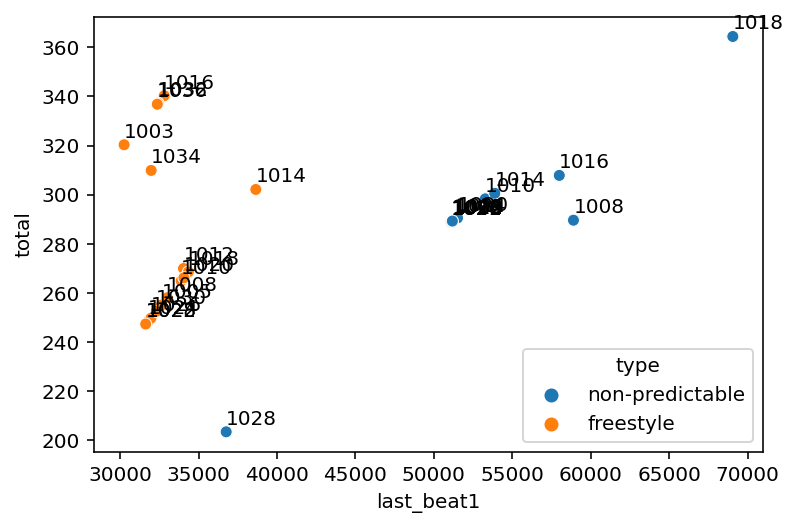

In [14]:
sns.scatterplot(data=timing_df, x='last_beat1', y='total', hue='type')
for row in timing_df.itertuples():
    plt.text( row.last_beat1, row.total+3, row.group)

In [15]:
[k for k in all_ticks.keys() if k[0]=='1028']

[('1028', 'Freestyle', 45),
 ('1028', 'Freestyle', 48),
 ('1028', 'Freestyle', 43),
 ('1028', 'Interaction', 43),
 ('1028', 'Interaction', 48),
 ('1028', 'Interaction', 45)]

In [16]:
timing_df['ratio']=timing_df.last_beat1/timing_df.total

In [17]:
timing_df[(timing_df.type=='non-predictable') & (~timing_df.group.isin([1008]))]

,type,group,minute,seconds,hundreds,total,last_beat,last_beat1,ratio
0,non-predictable,1003,4,49,25,289.25,"(3, 51187)",51187,176.964564
1,non-predictable,1005,4,49,48,289.48,"(3, 51247)",51247,177.031228
3,non-predictable,1010,4,58,30,298.30,"(3, 53276)",53276,178.598726
4,non-predictable,1012,4,49,37,289.37,"(3, 51217)",51217,176.994851
5,non-predictable,1014,5,0,56,300.56,"(3, 53882)",53882,179.272026
6,non-predictable,1016,5,7,85,307.85,"(3, 57996)",57996,188.390450
7,non-predictable,1018,6,4,45,364.45,"(3, 69057)",69057,189.482782
8,non-predictable,1020,4,49,10,289.10,"(3, 51162)",51162,176.969907
9,non-predictable,1022,4,49,15,289.15,"(3, 51178)",51178,176.994639
10,non-predictable,1024,4,50,1,290.01,"(3, 51371)",51371,177.135271


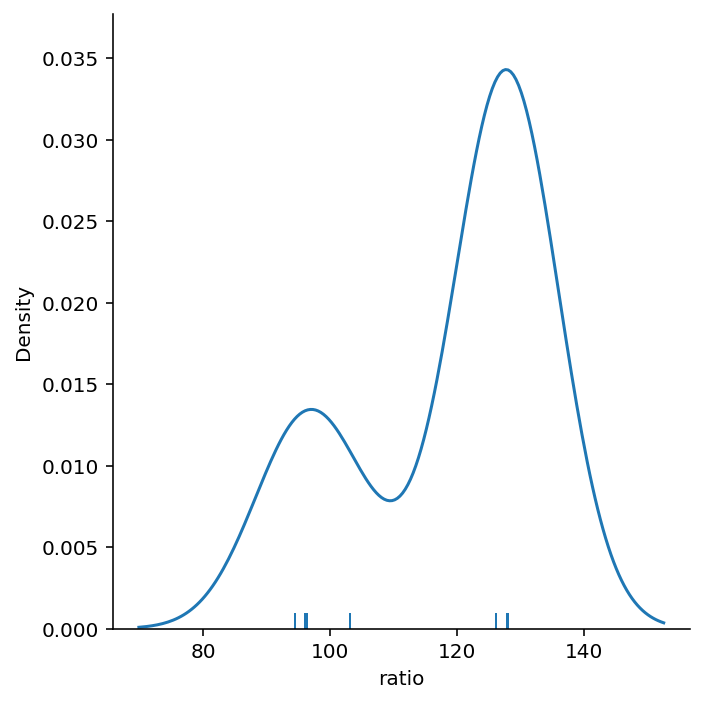

In [26]:
sns.displot( timing_df.loc[(timing_df.type!='non-predictable'),'ratio' ], kind='kde',rug=True)

In [18]:
#(timing_df.type=='non-predictable'),
timing_df.group[2]==1008

True

In [30]:
timing_df.loc[(timing_df.type!='non-predictable'),'ratio' ].map(round).value_counts()

128    11
96      3
126     1
103     1
94      1
Name: ratio, dtype: int64

In [29]:

timing_df.type.value_counts()

freestyle          17
non-predictable    17
Name: type, dtype: int64

In [31]:
timing_df.loc[(timing_df.type!='predictable'),'ratio' ].map(round).value_counts()

128    11
177    11
96      3
179     2
203     1
94      1
103     1
181     1
188     1
189     1
126     1
Name: ratio, dtype: int64

In [32]:
178/128

1.390625

In [33]:
180/128

1.40625

In [34]:
128/96

1.3333333333333333

In [38]:
np.arange(96,320,16)

array([ 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288,
       304])

In [39]:
timing_df['ratio16']=timing_df.ratio.map(lambda n: round(n/16)*16)
timing_df

,type,group,minute,seconds,hundreds,total,last_beat,last_beat1,ratio,ratio16
0,non-predictable,1003,4,49,25,289.25,"(3, 51187)",51187,176.964564,176
1,non-predictable,1005,4,49,48,289.48,"(3, 51247)",51247,177.031228,176
2,non-predictable,1008,4,49,59,289.59,"(3, 58899)",58899,203.387548,208
3,non-predictable,1010,4,58,30,298.30,"(3, 53276)",53276,178.598726,176
4,non-predictable,1012,4,49,37,289.37,"(3, 51217)",51217,176.994851,176
5,non-predictable,1014,5,0,56,300.56,"(3, 53882)",53882,179.272026,176
6,non-predictable,1016,5,7,85,307.85,"(3, 57996)",57996,188.390450,192
7,non-predictable,1018,6,4,45,364.45,"(3, 69057)",69057,189.482782,192
8,non-predictable,1020,4,49,10,289.10,"(3, 51162)",51162,176.969907,176
9,non-predictable,1022,4,49,15,289.15,"(3, 51178)",51178,176.994639,176


In [46]:
(timing_df.ratio-timing_df.ratio16).map(round).value_counts().sort_index()

-5     1
-4     1
-3     1
-2     2
 0    14
 1    11
 3     2
 5     1
 7     1
dtype: int64

In [49]:
{(r.group, r.type): r.ratio16 for r in timing_df.itertuples()}

{(1003, 'non-predictable'): 176,
 (1005, 'non-predictable'): 176,
 (1008, 'non-predictable'): 208,
 (1010, 'non-predictable'): 176,
 (1012, 'non-predictable'): 176,
 (1014, 'non-predictable'): 176,
 (1016, 'non-predictable'): 192,
 (1018, 'non-predictable'): 192,
 (1020, 'non-predictable'): 176,
 (1022, 'non-predictable'): 176,
 (1024, 'non-predictable'): 176,
 (1026, 'non-predictable'): 176,
 (1028, 'non-predictable'): 176,
 (1030, 'non-predictable'): 176,
 (1032, 'non-predictable'): 176,
 (1034, 'non-predictable'): 176,
 (1036, 'non-predictable'): 176,
 (1003, 'freestyle'): 96,
 (1005, 'freestyle'): 128,
 (1008, 'freestyle'): 128,
 (1010, 'freestyle'): 128,
 (1012, 'freestyle'): 128,
 (1014, 'freestyle'): 128,
 (1016, 'freestyle'): 96,
 (1018, 'freestyle'): 128,
 (1020, 'freestyle'): 128,
 (1022, 'freestyle'): 128,
 (1024, 'freestyle'): 128,
 (1026, 'freestyle'): 128,
 (1028, 'freestyle'): 128,
 (1030, 'freestyle'): 128,
 (1032, 'freestyle'): 96,
 (1034, 'freestyle'): 96,
 (1036, 'fr